In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.drop(['Gender','User ID'],axis=1,inplace=True)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Train test split 

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('Purchased',axis=1),data['Purchased'],test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 2), (120, 2), (280,), (120,))

## Standerd scaler

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)   #fit the scaler to train set

#transformed train test set
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [6]:
scaler.mean_

array([3.79642857e+01, 6.85250000e+04])

In [7]:
x_train.head()

,Age,EstimatedSalary
23,45,22000
253,37,146000
196,30,79000
343,47,51000
285,37,93000


In [8]:
x_train_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [9]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [10]:
x_train_scaled.head()

,Age,EstimatedSalary
0,0.662706,-1.365080
1,-0.090828,2.273178
2,-0.750170,0.307345
3,0.851090,-0.514197
4,-0.090828,0.718116


In [11]:
x_test_scaled.head()

,Age,EstimatedSalary
0,0.380131,1.158228
1,0.756898,0.395367
2,-0.279211,0.189982
3,-0.090828,0.336686
4,-1.692088,0.160641


In [12]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


## effect of scaling

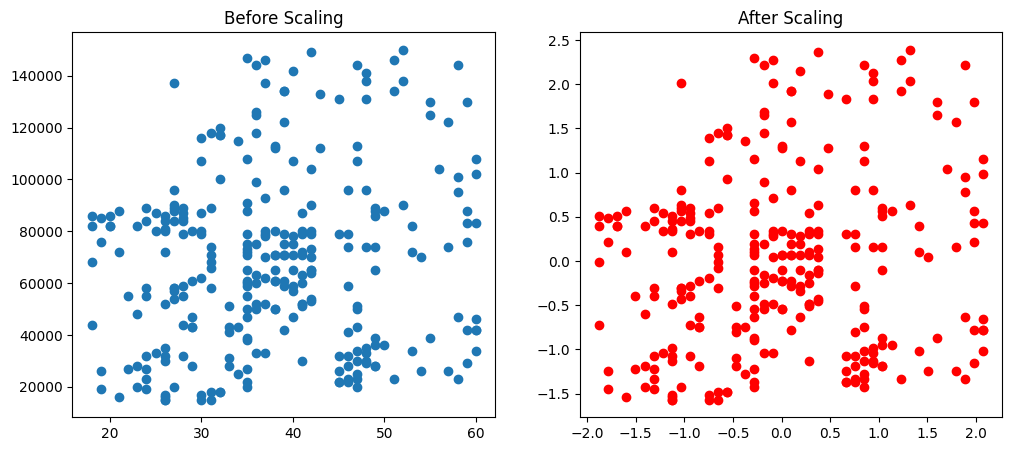

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

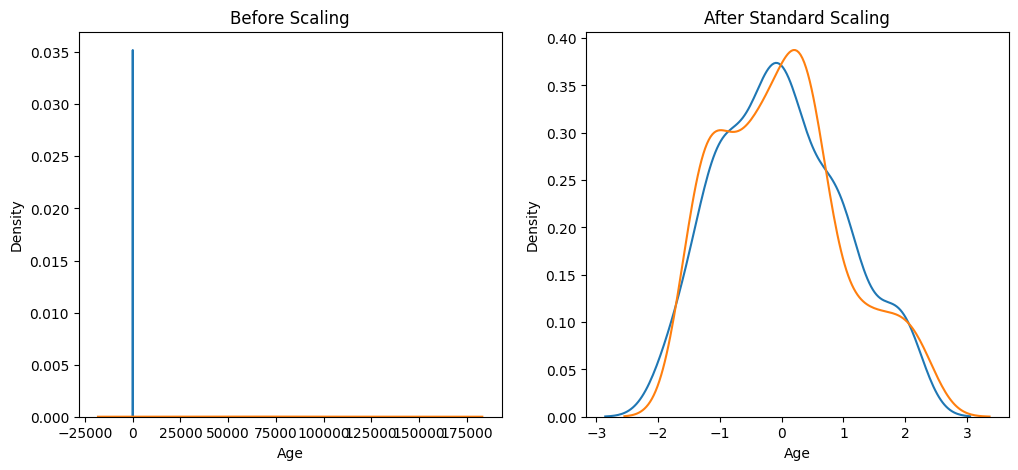

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## comparisan of distribution

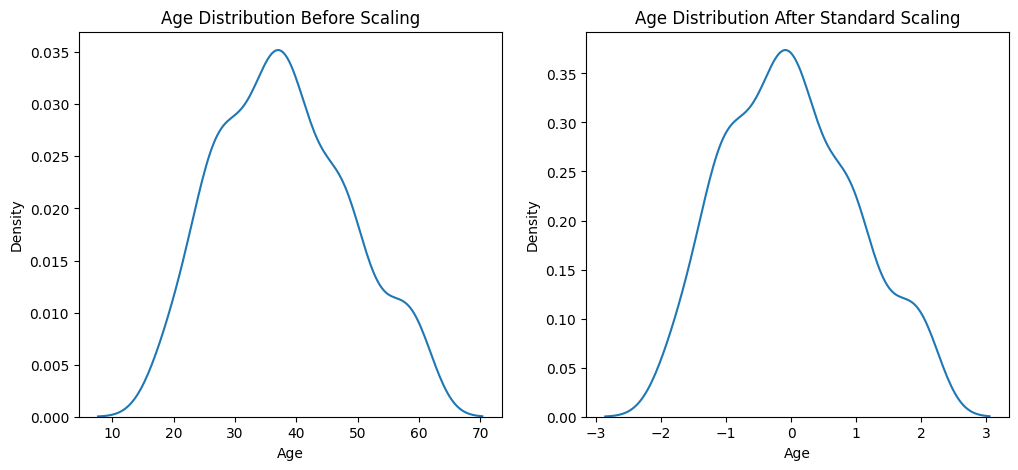

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

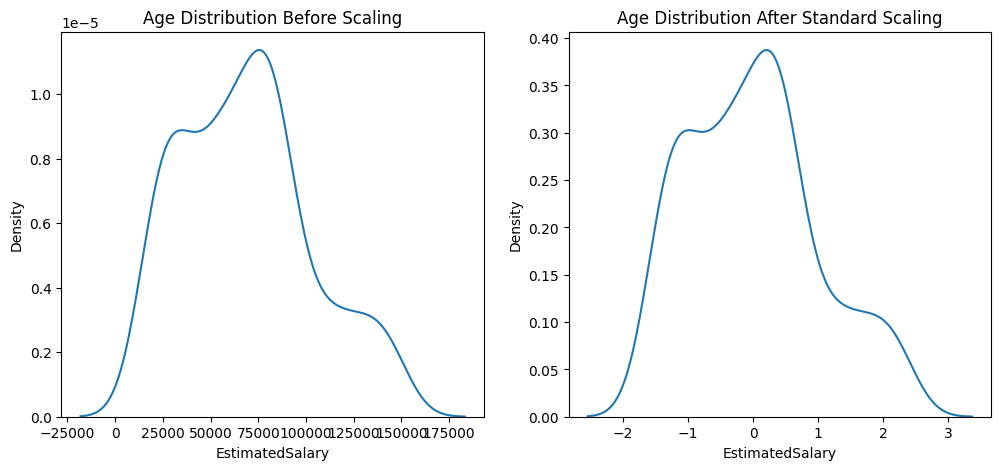

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Why scaling is important?

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [19]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred=lr.predict(x_test)
y_scaled_pred=lr_scaled.predict(x_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print('Actual:',accuracy_score(y_test,y_pred)*100)
print('Predicted:',accuracy_score(y_test,y_scaled_pred)*100)

Actual: 68.33333333333333
Predicted: 89.16666666666667


In [23]:
# apply scaling in decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)
print("Actual",accuracy_score(y_test,y_pred)*100)
print("Scaled",accuracy_score(y_test,y_pred_scaled)*100)

Actual 83.33333333333334
Scaled 84.16666666666667


In [27]:
# there is no change in accuracy if we are using decision tree

## Effect of Outlier

In [28]:
a=pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
data = pd.concat([a,data],ignore_index=True)
data

,Age,EstimatedSalary,Purchased
0,5,1000,0
1,90,250000,1
2,95,350000,1
3,19,19000,0
4,35,20000,0
...,...,...,...
398,46,41000,1
399,51,23000,1
400,50,20000,1
401,36,33000,0


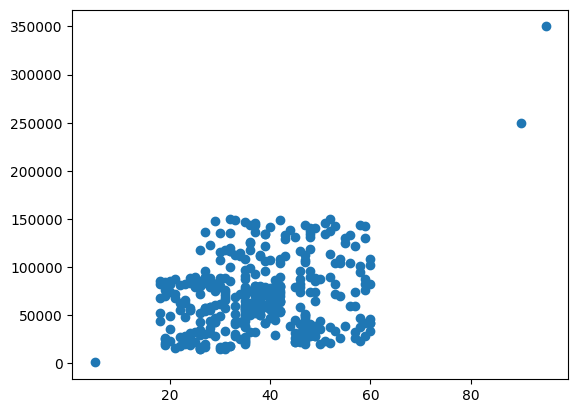

In [29]:
plt.scatter(data['Age'],data['EstimatedSalary'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis=1),data['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [31]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


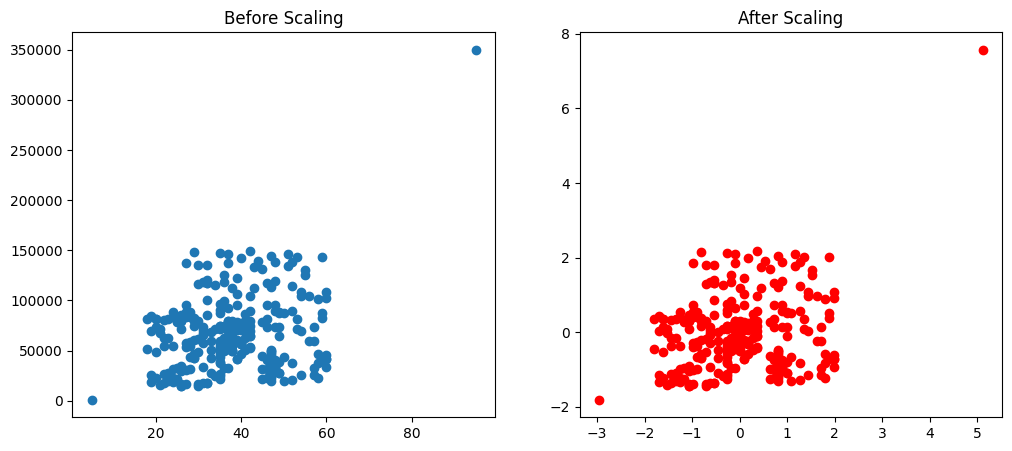

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()